In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt
import torch as th

In [2]:
from observer import Observer, Cone
from inks import Neugebauer, InkGamut, find_best_ns, CellNeugebauer
from spectra import Spectra, Pigment, Illuminant

In [3]:
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

In [41]:
d65 = Illuminant.get("D65")
natural = Illuminant.get("Natural")
f2 = Illuminant.get("FL2")
f7 = Illuminant.get("FL7")
d50 = Illuminant.get("D50")
cie_a = Illuminant.get("A")
fl = Illuminant.get("Cool White FL")
led = Illuminant.get("Phosphor LED YAG")
led_b5 = Illuminant.get("LED-B5")

In [42]:
4tetrachromat_natural = Observer.tetrachromat(illuminant=natural)
tetrachromat_f2 = Observer.tetrachromat(illuminant=f2)
tetrachromat_f7 = Observer.tetrachromat(illuminant=f7)

tetrachromat_d50 = Observer.tetrachromat(illuminant=d50)
tetrachromat_a = Observer.tetrachromat(illuminant=cie_a)
tetrachromat_fl = Observer.tetrachromat(illuminant=fl)
tetrachromat_led = Observer.tetrachromat(illuminant=led)
tetrachromat_ledb5 = Observer.tetrachromat(illuminant=led_b5)

In [44]:
all_tetrachromats = {
    "d65": tetrachromat_d65,
    "d50": tetrachromat_d50,
    "natural": tetrachromat_natural,
    "f2": tetrachromat_f2,
    "f7": tetrachromat_f7,
    "fl": tetrachromat_fl,
    "cie_a": tetrachromat_a,
    "led": tetrachromat_led,
    "led_b5": tetrachromat_ledb5
}

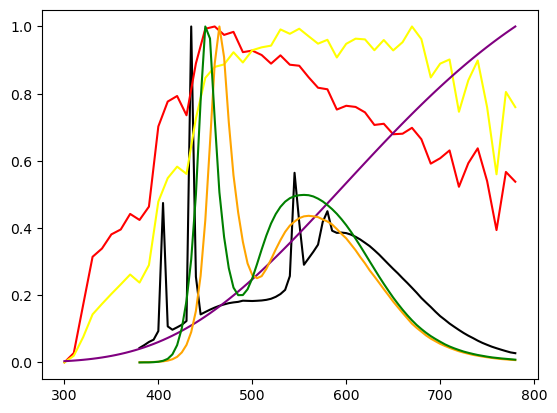

In [93]:
natural.plot(color='black')
d65.plot(color='red')
# f2.plot(color='green')
d50.plot(color='yellow')
cie_a.plot(color='purple')
# fl.plot(color='blue')
led.plot(color='orange')
led_b5.plot(color='green')

## New iteration code

In [8]:
from metamers import iterate_samples, examine_samples

In [8]:
mets = {}
with open(f'011024.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "Candidates": continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        mets[name] = spectra

In [90]:
paper = []
with open(f'011024.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] == "Light":
            color_data = np.array(row[33:],dtype=float)
            spectra = Spectra(data=color_data, wavelengths=wavelengths10)
            paper.append(spectra)

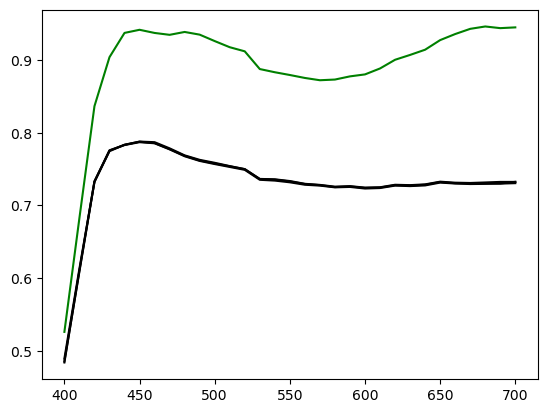

In [92]:
paper[0].plot(color='black')
paper[1].plot(color='black')
paper[2].plot(color='black')
cijk["0000"].plot(color='green')

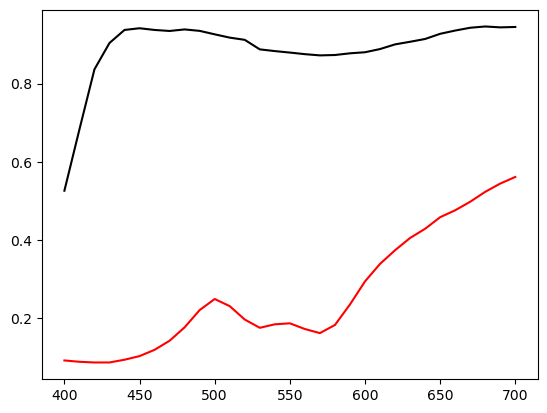

In [82]:
paper[0].plot(color='red')
cijk["0000"].plot(color='black')

In [9]:
simple, detailed = examine_samples(mets, tetrachromat_d65)

In [10]:
simple

[(0.048901113281708986, 0.019156153327190673),
 (0.047347434186971515, 0.018144459591119322),
 (0.03018325933420829, 0.0075238990506060477),
 (0.027991633071981215, 0.010581900234532704),
 (0.023986160295888015, 0.01147334673859729),
 (0.022432481201150545, 0.012485040474668641),
 (0.021314676275713929, 0.01802919932950392),
 (0.016361417969913195, 0.015906090653385885),
 (0.016073372983615219, 0.015871978579224455)]

In [21]:
def print_detailed(detailed):
    for (q_dist, lms_dist, (p_i, smql_i), (p_j, smql_j)) in detailed:
        print(( tuple((100*p_i).astype(int) ) , tuple((100*p_j).astype(int))), "\n", 
              "\t", np.array2string(smql_i, precision=4), "\n",
              "\t", np.array2string(smql_j,precision=4), "\n", 
              "\t", round(q_dist, 4), "|",round(lms_dist,4))

In [12]:
print_detailed(detailed[:10])

((0, 0, 65, 100), (20, 95, 0, 45)) 
 	 [ 0.2428  0.3507  0.3942  0.4681] 
 	 [ 0.2502  0.3698  0.4431  0.4851] 
 	 0.0489 | 0.0192
((0, 0, 65, 100), (20, 90, 5, 45)) 
 	 [ 0.2428  0.3507  0.3942  0.4681] 
 	 [ 0.254   0.3688  0.4415  0.4835] 
 	 0.0473 | 0.0181
((30, 100, 20, 30), (10, 10, 70, 100)) 
 	 [ 0.2115  0.2831  0.3384  0.3703] 
 	 [ 0.2039  0.2784  0.3082  0.3658] 
 	 0.0302 | 0.0075
((0, 0, 65, 100), (25, 90, 0, 50)) 
 	 [ 0.2428  0.3507  0.3942  0.4681] 
 	 [ 0.2533  0.3575  0.4222  0.4594] 
 	 0.028 | 0.0106
((5, 10, 55, 90), (20, 95, 0, 45)) 
 	 [ 0.2474  0.3813  0.4191  0.4787] 
 	 [ 0.2502  0.3698  0.4431  0.4851] 
 	 0.024 | 0.0115
((5, 10, 55, 90), (20, 90, 5, 45)) 
 	 [ 0.2474  0.3813  0.4191  0.4787] 
 	 [ 0.254   0.3688  0.4415  0.4835] 
 	 0.0224 | 0.0125
((10, 20, 60, 80), (30, 80, 10, 50)) 
 	 [ 0.3039  0.3694  0.3975  0.4493] 
 	 [ 0.2859  0.3663  0.4188  0.4505] 
 	 0.0213 | 0.018
((20, 90, 0, 15), (0, 20, 60, 80)) 
 	 [ 0.3223  0.4031  0.4738  0.5138] 
 	 [ 0

In [9]:
cijk = {}
with open(f'010624.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "CIJK": continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        cijk[name] = spectra

In [10]:
cijk_neug = CellNeugebauer(cijk)
cijk_gamut = InkGamut(cijk_neug, illuminant=d65)

In [15]:
next_samples = iterate_samples(mets, cijk_gamut, tetrachromat_d65)

iterating  (0, 8)
Before [ 0.    0.    0.65  1.  ] [ 0.2   0.95  0.    0.45]
target delta i [ 0.27899343  0.71633674 -0.07646984  0.63496197]
updated i: [ 0.05  0.05  0.45  0.8 ]
target delta j [-0.27899343 -0.71633674  0.07646984 -0.63496197]
updated j: [ 0.2   0.95  0.05  0.65]
iterating  (0, 12)
Before [ 0.    0.    0.65  1.  ] [ 0.25  0.9   0.    0.5 ]
target delta i [ 0.67453099  0.43400463 -0.22772463 -0.55207737]
updated i: [ 0.15  0.1   0.55  0.9 ]
target delta j [-0.67453099 -0.43400463  0.22772463  0.55207737]
updated j: [ 0.05  0.95  0.15  0.7 ]
iterating  (0, 13)
Before [ 0.    0.    0.65  1.  ] [ 0.2   0.9   0.05  0.45]
target delta i [ 0.426013    0.68694197 -0.07996125  0.58329225]
updated i: [ 0.05  0.05  0.5   0.8 ]
target delta j [-0.426013   -0.68694197  0.07996125 -0.58329225]
updated j: [ 0.2   0.95  0.05  0.4 ]
iterating  (5, 8)
Before [ 0.05  0.1   0.55  0.9 ] [ 0.2   0.95  0.    0.45]
iterating  (5, 13)
Before [ 0.05  0.1   0.55  0.9 ] [ 0.2   0.9   0.05  0.45]


/Users/varun/Documents/Python/Mixing/metamers.py:26: RuntimeWarning: invalid value encountered in scalar divide
  score = np.dot(delta_smql, target_delta_smql) / (np.linalg.norm(delta_smql) * np.linalg.norm(target_delta_smql))


target delta i [ 0.59436679 -0.52410103  0.23297882 -0.56370834]
updated i: [ 0.2   0.7   0.05  0.15]
target delta j [-0.59436679  0.52410103 -0.23297882  0.56370834]
updated j: [ 0.15  0.65  0.15  0.4 ]
iterating  (24, 36)
Before [ 0.1  0.2  0.6  0.8] [ 0.3  0.8  0.1  0.5]
target delta i [-0.95270799 -0.16380822 -0.24791604  0.06365525]
updated i: [ 0.05  0.    0.65  0.95]
target delta j [ 0.95270799  0.16380822  0.24791604 -0.06365525]
updated j: [ 0.3  0.8  0.1  0.3]
iterating  (27, 29)
Before [ 0.3  1.   0.2  0.3] [ 0.1  0.1  0.7  1. ]
target delta j [ 0.72059457  0.44322292 -0.31730864  0.42849987]
updated j: [ 0.05  0.    0.75  0.9 ]


In [11]:
(cijk_gamut.get_spectra((0.3, 1, 0.2, 0.3)))

In [12]:
tetrachromat_d65.observe(cijk_gamut.get_spectra((0.1, 0.1, 0.7, 1)))

array([ 0.14096933,  0.24338667,  0.28370112,  0.35019017])

In [18]:
tetrachromat_d65.observe(mets["30 100 20 30"])

array([ 0.21146501,  0.28307422,  0.33841695,  0.370289  ])

In [19]:
tetrachromat_d65.observe(mets["10 10 70 100"])

array([ 0.20394111,  0.27844643,  0.30823369,  0.36581493])

ok so now, for ex, it should push all all j values up except for q axis

In [20]:
tetrachromat_d65.observe(cijk_gamut.get_spectra((0.1, 0.1, 0.7, 1)))

array([ 0.14096933,  0.24338667,  0.28370112,  0.35019017])

In [21]:
tetrachromat_d65.observe(cijk_gamut.get_spectra((0, 0, 0.85, 0.95)))

array([ 0.16036624,  0.22765693,  0.26975458,  0.34781678])

lmao so it didnt really do as intended

In [22]:
next_samples

{(5, 0, 65, 95),
 (5, 0, 75, 90),
 (5, 5, 45, 80),
 (5, 5, 50, 80),
 (5, 25, 55, 85),
 (5, 40, 55, 90),
 (5, 95, 15, 70),
 (15, 10, 55, 90),
 (15, 65, 15, 40),
 (20, 70, 5, 15),
 (20, 70, 5, 35),
 (20, 85, 5, 60),
 (20, 95, 5, 40),
 (20, 95, 5, 65),
 (30, 80, 10, 30)}

## Let's start iterating

In [58]:
def print_all_detailed(samples, threshold, num=5):
    for n, t in all_tetrachromats.items():
        _, detailed = examine_samples(samples, t, threshold=threshold)
        print(n)
        print(end="\t")
        print_detailed(detailed[:num])
        

In [19]:
def iterate_all_samples(samples, threshold):
    all_samples = set()
    for n, t in all_tetrachromats.items():
        next_samples = iterate_samples(samples, cijk_gamut, t, threshold=threshold)
        all_samples = all_samples | next_samples
    return all_samples

In [ ]:
print_all_detailed(mets, threshold=0.03)

### Iteration 1

In [15]:
iterations = {}
with open(f'011124.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "Iter": continue
        
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        iterations[name] = spectra

In [16]:
iterations

{'00 00 65 100': <spectra.Spectra at 0x28f8be2d0>,
 '25 100 00 50': <spectra.Spectra at 0x28e6d7dd0>,
 '00 05 55 95': <spectra.Spectra at 0x28edb4d50>,
 '20 95 00 45': <spectra.Spectra at 0x28f8bfd90>,
 '00 00 60 80': <spectra.Spectra at 0x28f8be590>,
 '25 85 00 25': <spectra.Spectra at 0x28f8bfe90>,
 '00 10 55 80': <spectra.Spectra at 0x28f8be690>,
 '20 90 00 15': <spectra.Spectra at 0x28f898050>,
 '00 10 60 75': <spectra.Spectra at 0x28f8be6d0>,
 '20 90 05 00': <spectra.Spectra at 0x28efde410>,
 '05 10 55 90': <spectra.Spectra at 0x28f8be7d0>,
 '25 90 00 50': <spectra.Spectra at 0x28f872f50>,
 '00 00 60 90': <spectra.Spectra at 0x28f8be790>,
 '20 90 05 45': <spectra.Spectra at 0x28f8719d0>,
 '20 20 60 100': <spectra.Spectra at 0x28f8be990>,
 '40 100 00 70': <spectra.Spectra at 0x28f8d0c90>,
 '00 00 50 70': <spectra.Spectra at 0x28f8bea90>,
 '20 70 00 30': <spectra.Spectra at 0x28f8d0b50>,
 '00 10 50 100': <spectra.Spectra at 0x28f8beb90>,
 '20 90 00 80': <spectra.Spectra at 0x28f8d0d

In [22]:
print_all_detailed(iterations, threshold=0.02)

d65 
	((20, 95, 0, 45), (5, 10, 55, 90)) 
 	 [ 0.1781  0.3244  0.4041  0.4491] 
 	 [ 0.1894  0.3195  0.3648  0.4369] 
 	 0.0393 | 0.0121
((20, 90, 0, 15), (0, 20, 60, 80)) 
 	 [ 0.227   0.3443  0.423   0.466 ] 
 	 [ 0.2402  0.337   0.3851  0.4631] 
 	 0.0378 | 0.0133
((0, 0, 60, 90), (20, 90, 5, 45)) 
 	 [ 0.1867  0.3038  0.3525  0.434 ] 
 	 [ 0.1834  0.3144  0.3899  0.4353] 
 	 0.0374 | 0.0106
((25, 90, 0, 50), (0, 0, 60, 90)) 
 	 [ 0.1845  0.3149  0.3838  0.4222] 
 	 [ 0.1867  0.3038  0.3525  0.434 ] 
 	 0.0313 | 0.0118
((20, 90, 5, 0), (0, 20, 60, 80)) 
 	 [ 0.2454  0.3409  0.416   0.4594] 
 	 [ 0.2402  0.337   0.3851  0.4631] 
 	 0.0308 | 0.0051
d50 
	((20, 95, 0, 45), (0, 0, 60, 90)) 
 	 [ 0.2098  0.296   0.3574  0.3906] 
 	 [ 0.2198  0.2772  0.3117  0.3775] 
 	 0.0456 | 0.0188
((20, 95, 0, 45), (5, 10, 55, 90)) 
 	 [ 0.2098  0.296   0.3574  0.3906] 
 	 [ 0.223   0.2915  0.3226  0.38  ] 
 	 0.0347 | 0.0132
((20, 90, 0, 15), (0, 20, 60, 80)) 
 	 [ 0.2673  0.3142  0.3741  0.4053] 
 

In [23]:
next_samples = iterate_all_samples(iterations, threshold=0.02)

iterating 0/10
iterating 1/10
iterating 2/10
iterating 3/10
iterating 4/10
iterating 5/10
iterating 6/10
iterating 7/10
iterating 8/10
iterating 9/10
iterating 10/10
iterating 0/11
iterating 1/11
iterating 2/11
iterating 3/11
iterating 4/11
iterating 5/11
iterating 6/11
iterating 7/11
iterating 8/11
iterating 9/11
iterating 10/11
iterating 11/11
iterating 0/0
iterating 0/1
iterating 1/1


In [24]:
list(next_samples)

[(20, 95, 5, 30),
 (10, 0, 75, 95),
 (5, 10, 50, 95),
 (10, 90, 15, 15),
 (20, 5, 65, 90),
 (15, 85, 10, 55),
 (25, 70, 5, 55),
 (15, 0, 80, 95),
 (20, 0, 55, 75),
 (15, 85, 10, 15),
 (5, 95, 20, 30),
 (35, 95, 15, 30),
 (20, 10, 40, 90),
 (15, 25, 45, 90),
 (10, 80, 20, 65),
 (5, 95, 15, 15),
 (15, 5, 40, 90),
 (10, 5, 50, 90),
 (20, 75, 10, 60),
 (15, 85, 10, 60),
 (5, 80, 20, 60),
 (25, 95, 20, 70),
 (20, 5, 55, 75),
 (5, 15, 55, 95),
 (35, 85, 5, 25),
 (5, 30, 50, 95),
 (40, 85, 5, 25),
 (40, 75, 5, 25),
 (20, 95, 40, 10),
 (25, 95, 25, 50),
 (30, 95, 15, 70),
 (35, 80, 5, 25),
 (5, 5, 55, 90),
 (5, 5, 45, 95),
 (15, 95, 10, 25)]

### Iteration 2

In [25]:
iterations = {}
with open(f'011124.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "Iter": continue
        
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        iterations[name] = spectra

In [26]:
len(iterations)

63

In [45]:
print_all_detailed(iterations, threshold=0.015)

d65 
	((30, 100, 10, 50), (10, 0, 75, 95)) 
 	 [ 0.1368  0.2386  0.2999  0.3387] 
 	 [ 0.1454  0.2249  0.2599  0.326 ] 
 	 0.04 | 0.0137
((20, 95, 0, 45), (5, 10, 55, 90)) 
 	 [ 0.1781  0.3244  0.4041  0.4491] 
 	 [ 0.1894  0.3195  0.3648  0.4369] 
 	 0.0393 | 0.0121
((20, 90, 0, 15), (0, 20, 60, 80)) 
 	 [ 0.227   0.3443  0.423   0.466 ] 
 	 [ 0.2402  0.337   0.3851  0.4631] 
 	 0.0378 | 0.0133
((0, 0, 60, 90), (20, 90, 5, 45)) 
 	 [ 0.1867  0.3038  0.3525  0.434 ] 
 	 [ 0.1834  0.3144  0.3899  0.4353] 
 	 0.0374 | 0.0106
((0, 0, 60, 80), (15, 85, 10, 15)) 
 	 [ 0.2593  0.3718  0.4155  0.4908] 
 	 [ 0.2683  0.367   0.4469  0.4972] 
 	 0.0314 | 0.009
d50 
	((30, 100, 10, 50), (10, 0, 75, 95)) 
 	 [ 0.1611  0.2177  0.2652  0.2946] 
 	 [ 0.1712  0.2052  0.2298  0.2836] 
 	 0.0354 | 0.0125
((20, 95, 0, 45), (5, 10, 55, 90)) 
 	 [ 0.2098  0.296   0.3574  0.3906] 
 	 [ 0.223   0.2915  0.3226  0.38  ] 
 	 0.0347 | 0.0132
((0, 0, 60, 90), (20, 90, 5, 45)) 
 	 [ 0.2198  0.2772  0.3117  0.3775]

In [37]:
next_samples = iterate_all_samples(iterations, threshold=0.015)

iterating 0/21
iterating 1/21
iterating 2/21
iterating 3/21
iterating 4/21
iterating 5/21
iterating 6/21
iterating 7/21
iterating 8/21
iterating 9/21
iterating 10/21
iterating 11/21
iterating 12/21
iterating 13/21
iterating 14/21
iterating 15/21
iterating 16/21
iterating 17/21
iterating 18/21
iterating 19/21
iterating 20/21
iterating 21/21
iterating 0/22
iterating 1/22
iterating 2/22
iterating 3/22
iterating 4/22
iterating 5/22
iterating 6/22
iterating 7/22
iterating 8/22
iterating 9/22
iterating 10/22
iterating 11/22
iterating 12/22
iterating 13/22
iterating 14/22
iterating 15/22
iterating 16/22
iterating 17/22
iterating 18/22
iterating 19/22
iterating 20/22
iterating 21/22
iterating 22/22
iterating 0/0
iterating 0/0
iterating 0/0
iterating 0/2
iterating 1/2
iterating 2/2


In [38]:
len(next_samples)

37

In [39]:
list(next_samples)

[(25, 0, 65, 95),
 (0, 5, 75, 80),
 (15, 90, 10, 60),
 (10, 10, 75, 95),
 (20, 95, 30, 65),
 (5, 20, 55, 95),
 (30, 5, 80, 75),
 (35, 95, 20, 30),
 (25, 85, 5, 50),
 (30, 95, 20, 50),
 (5, 45, 50, 90),
 (5, 30, 50, 85),
 (20, 95, 25, 75),
 (10, 95, 20, 50),
 (15, 75, 15, 65),
 (5, 20, 60, 60),
 (0, 5, 65, 75),
 (30, 95, 25, 70),
 (10, 10, 70, 95),
 (10, 25, 50, 90),
 (25, 90, 0, 45),
 (20, 90, 0, 10),
 (30, 95, 25, 30),
 (10, 5, 60, 75),
 (35, 90, 10, 90),
 (30, 70, 5, 70),
 (0, 5, 75, 75),
 (35, 95, 10, 30),
 (5, 15, 60, 60),
 (10, 95, 10, 50),
 (15, 95, 10, 10),
 (30, 20, 75, 75),
 (15, 70, 15, 65),
 (30, 0, 60, 95),
 (10, 90, 20, 30),
 (10, 5, 50, 95),
 (10, 35, 45, 95)]

### Iteration 3

In [46]:
iterations = {}
with open(f'011124.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "Iter": continue
        
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        iterations[name] = spectra

In [47]:
print_all_detailed(iterations, threshold=0.01)

d65 
	((0, 0, 60, 80), (15, 85, 10, 15)) 
 	 [ 0.2593  0.3718  0.4155  0.4908] 
 	 [ 0.2683  0.367   0.4469  0.4972] 
 	 0.0314 | 0.009
((20, 90, 0, 80), (5, 30, 50, 95)) 
 	 [ 0.1342  0.3016  0.3789  0.4252] 
 	 [ 0.1428  0.2921  0.3477  0.4217] 
 	 0.0312 | 0.0095
((20, 90, 5, 0), (0, 20, 60, 80)) 
 	 [ 0.2454  0.3409  0.416   0.4594] 
 	 [ 0.2402  0.337   0.3851  0.4631] 
 	 0.0308 | 0.0051
((10, 25, 50, 90), (25, 90, 0, 45)) 
 	 [ 0.1763  0.3016  0.3473  0.412 ] 
 	 [ 0.1851  0.308   0.377   0.4155] 
 	 0.0296 | 0.0089
((5, 30, 50, 85), (15, 75, 15, 65)) 
 	 [ 0.2043  0.3347  0.3874  0.4584] 
 	 [ 0.2006  0.3413  0.4152  0.468 ] 
 	 0.0279 | 0.0097
d50 
	((0, 0, 60, 90), (20, 90, 5, 45)) 
 	 [ 0.2198  0.2772  0.3117  0.3775] 
 	 [ 0.216   0.2868  0.3448  0.3786] 
 	 0.0331 | 0.0097
((20, 90, 5, 0), (0, 20, 60, 80)) 
 	 [ 0.289   0.3111  0.3679  0.3995] 
 	 [ 0.2829  0.3075  0.3406  0.4028] 
 	 0.0273 | 0.0061
((5, 5, 55, 90), (15, 95, 10, 25)) 
 	 [ 0.2277  0.2983  0.3286  0.385 ] 

In [49]:
next_samples = iterate_all_samples(iterations, threshold=0.01)

iterating 0/12
iterating 1/12
iterating 2/12
iterating 3/12
iterating 4/12
iterating 5/12
iterating 6/12
iterating 7/12
iterating 8/12
iterating 9/12
iterating 10/12
iterating 11/12
iterating 12/12
iterating 0/13
iterating 1/13
iterating 2/13
iterating 3/13
iterating 4/13
iterating 5/13
iterating 6/13
iterating 7/13
iterating 8/13
iterating 9/13
iterating 10/13
iterating 11/13
iterating 12/13
iterating 13/13
iterating 0/0
iterating 0/0
iterating 0/0
iterating 0/0
iterating 0/0
iterating 0/1
iterating 1/1


In [50]:
len(next_samples)

18

In [52]:
list(next_samples)

[(15, 75, 45, 85),
 (30, 90, 15, 85),
 (35, 95, 5, 80),
 (20, 95, 5, 65),
 (40, 40, 65, 95),
 (40, 40, 45, 95),
 (5, 30, 55, 90),
 (5, 15, 50, 90),
 (40, 40, 55, 95),
 (5, 10, 50, 90),
 (10, 5, 55, 90),
 (40, 40, 40, 95),
 (30, 90, 30, 45),
 (20, 80, 10, 55),
 (10, 40, 45, 95),
 (35, 90, 25, 45),
 (25, 75, 5, 65),
 (40, 40, 50, 95)]

### Iteration 4

In [53]:
iterations = {}
with open(f'011124.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "Iter": continue
        
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        iterations[name] = spectra

In [54]:
len(iterations)

118

In [135]:
tetrachromat_d65.observe(iterations['05 20 55 95'])

array([ 0.14634191,  0.28396218,  0.33552005,  0.4095733 ])

In [136]:
tetrachromat_d65.observe(iterations['20 95 05 65'])

array([ 0.14500861,  0.29391078,  0.36966216,  0.41651904])

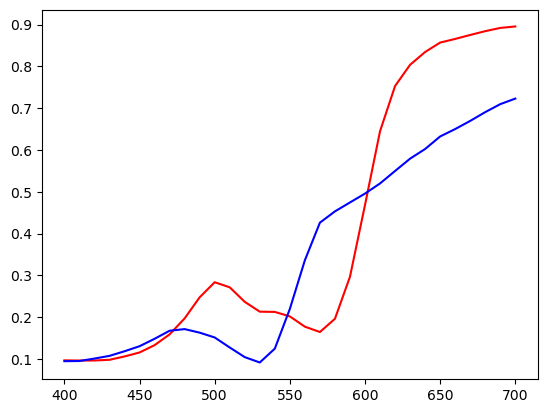

In [134]:
iterations['05 20 55 95'].plot(color='red')
iterations['20 95 05 65'].plot(color='blue')

In [60]:
print_all_detailed(iterations, 0.01, num=10)

d65
	((5, 20, 55, 95), (20, 95, 5, 65)) 
 	 [ 0.1463  0.284   0.3355  0.4096] 
 	 [ 0.145   0.2939  0.3697  0.4165] 
 	 0.0341 | 0.0099
((0, 0, 60, 80), (15, 85, 10, 15)) 
 	 [ 0.2593  0.3718  0.4155  0.4908] 
 	 [ 0.2683  0.367   0.4469  0.4972] 
 	 0.0314 | 0.009
((20, 90, 0, 80), (5, 30, 50, 95)) 
 	 [ 0.1342  0.3016  0.3789  0.4252] 
 	 [ 0.1428  0.2921  0.3477  0.4217] 
 	 0.0312 | 0.0095
((20, 90, 5, 0), (0, 20, 60, 80)) 
 	 [ 0.2454  0.3409  0.416   0.4594] 
 	 [ 0.2402  0.337   0.3851  0.4631] 
 	 0.0308 | 0.0051
((10, 25, 50, 90), (25, 90, 0, 45)) 
 	 [ 0.1763  0.3016  0.3473  0.412 ] 
 	 [ 0.1851  0.308   0.377   0.4155] 
 	 0.0296 | 0.0089
((10, 5, 50, 90), (25, 75, 5, 65)) 
 	 [ 0.1956  0.3373  0.3771  0.4396] 
 	 [ 0.2054  0.3426  0.405   0.4428] 
 	 0.0279 | 0.0098
((5, 30, 50, 85), (15, 75, 15, 65)) 
 	 [ 0.2043  0.3347  0.3874  0.4584] 
 	 [ 0.2006  0.3413  0.4152  0.468 ] 
 	 0.0279 | 0.0097
((20, 90, 5, 45), (5, 30, 55, 90)) 
 	 [ 0.1834  0.3144  0.3899  0.4353] 
 	 [

In [129]:
369-335

34

In [130]:
375 - 337

38

In [101]:
tetrachromat_d65.observe(cijk_gamut.get_spectra((0.05, 0.2, 0.55, 0.95)))

array([ 0.14960977,  0.28557095,  0.33766517,  0.41127463])

In [111]:
t = [cijk_gamut.get_spectra((0.05, 0.2, 0.55, 0.95)).wavelengths().astype(int),
     cijk_gamut.get_spectra((0.05, 0.2, 0.55, 0.95)).data()]

In [117]:
np.set_printoptions(suppress=True, precision=8)  

In [141]:
for w in iterations["20 95 05 65"].data():
    print(w)

0.0945232436
0.0949734226
0.100818902
0.107256383
0.118288733
0.130367503
0.148110643
0.167415887
0.171313927
0.162785381
0.151277602
0.127282768
0.104244955
0.0914339498
0.124545999
0.219587207
0.336123973
0.426030636
0.453035593
0.474390209
0.495637089
0.519918799
0.549715936
0.579238474
0.602332771
0.632377505
0.650078952
0.669579566
0.690621674
0.709679008
0.722947717


In [102]:
tetrachromat_d65.observe(cijk_gamut.get_spectra((0.2, 0.95, 0.05, 0.65)))

array([ 0.14375371,  0.29371584,  0.37574597,  0.429173  ])

d65

In [61]:
led_b5_mets = [
    ((20, 90, 5, 45), (5, 30, 55, 90)),
    ((10, 0, 75, 95), (25, 95, 25, 50)),
    ((20, 20, 60, 100), (35, 90, 10, 90)) 
]
led_mets = [
    ((20, 90, 5, 45), (5, 30, 55, 90)),
    ((20, 20, 60, 100), (35, 90, 10, 90)),
    ((40, 40, 45, 95), (40, 40, 50, 95)) 
]
a_mets = [
    ((20, 90, 5, 45), (5, 30, 55, 90)) 
]
fl_mets = [
    ((20, 90, 5, 45), (5, 30, 55, 90)),
    ((20, 20, 60, 100), (35, 90, 10, 90))
]
f7_mets = [
    ((20, 90, 5, 45), (5, 30, 55, 90)),
    ((20, 20, 60, 100), (35, 90, 10, 90)),
    ((40, 40, 45, 95), (40, 40, 50, 95)) 
]
f2_mets = [
    ((20, 90, 5, 45), (5, 30, 55, 90)),
    ((20, 20, 60, 100), (35, 90, 10, 90)) 
]

natural_mets = [
    ((20, 90, 5, 45), (5, 30, 55, 90)),
    ((20, 20, 60, 100), (35, 90, 10, 90)),
    ((40, 40, 45, 95), (40, 40, 50, 95)) 
]
d50_mets = [
    ((0, 0, 60, 90), (20, 90, 5, 45)),
    ((20, 90, 5, 45), (5, 30, 55, 90)),
    ((5, 20, 55, 95), (20, 95, 5, 65)) 
]
d65_mets = [
    ((20, 90, 5, 0), (0, 20, 60, 80)),
    ((5, 20, 55, 95), (20, 95, 5, 65)),
    ((20, 90, 5, 45), (5, 30, 55, 90))]

In [62]:
all_mets = led_b5_mets + led_mets + a_mets + fl_mets + f7_mets + f2_mets + natural_mets + d50_mets + d65_mets

In [66]:
len(all_mets)

23

In [65]:
all_mets

[((20, 90, 5, 45), (5, 30, 55, 90)),
 ((10, 0, 75, 95), (25, 95, 25, 50)),
 ((20, 20, 60, 100), (35, 90, 10, 90)),
 ((20, 90, 5, 45), (5, 30, 55, 90)),
 ((20, 20, 60, 100), (35, 90, 10, 90)),
 ((40, 40, 45, 95), (40, 40, 50, 95)),
 ((20, 90, 5, 45), (5, 30, 55, 90)),
 ((20, 90, 5, 45), (5, 30, 55, 90)),
 ((20, 20, 60, 100), (35, 90, 10, 90)),
 ((20, 90, 5, 45), (5, 30, 55, 90)),
 ((20, 20, 60, 100), (35, 90, 10, 90)),
 ((40, 40, 45, 95), (40, 40, 50, 95)),
 ((20, 90, 5, 45), (5, 30, 55, 90)),
 ((20, 20, 60, 100), (35, 90, 10, 90)),
 ((20, 90, 5, 45), (5, 30, 55, 90)),
 ((20, 20, 60, 100), (35, 90, 10, 90)),
 ((40, 40, 45, 95), (40, 40, 50, 95)),
 ((0, 0, 60, 90), (20, 90, 5, 45)),
 ((20, 90, 5, 45), (5, 30, 55, 90)),
 ((5, 20, 55, 95), (20, 95, 5, 65)),
 ((20, 90, 5, 0), (0, 20, 60, 80)),
 ((5, 20, 55, 95), (20, 95, 5, 65)),
 ((20, 90, 5, 45), (5, 30, 55, 90))]